# Convolution Mean Filter 

Stephen Iota

July 2018

a convolutional mean filter w/ mirror boundary conditions, compared with `skimage` implementation

## importing data

In [10]:
# standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from skimage.io import imread
from skimage.filters.rank import mean

plt.rcParams["image.cmap"] = "gray"

## mean filter

my idea is to make a new array 2 rows & cols bigger than `img`, then to do reflect boundary conditions into my new empty rows, then procede to do normal for loop as already written below


In [11]:
@jit
def mean_filter(img):
    
    #std mean kernal
    kern = np.ones([3,3])/9
    #return copy of img
    out = np.zeros(img.shape)
    
    #len of original img
    ocol = len(img[0,:])
    orow = len(img[:,0])
    
    # img_new contains boundary conditions in border
    img_new = np.zeros([orow+2,ocol+2])
    img_new[1:orow+1,1:ocol+1] = img
    
    # new values to iterate through
    nrow = len(img_new[:,0])
    ncol = len(img_new[0,:])
    
    # corners
    img_new[0,0] = img[1,1]
    img_new[0,ncol-1] = img[1,ocol-2]
    img_new[nrow-1,0] = img[orow-2,1]
    img_new[nrow-1,ncol-1] = img[orow-2,ocol-2]
    
    # left side
    img_new[1:nrow-1,0] = img[:,1]
    # right side check this one
    img_new[1:nrow-1,ncol-1] = img[:,ocol-2]
    # top side
    img_new[0,1:ncol-1] = img[1,:]
    # bottom side
    img_new[nrow-1,1:ncol-1] = img[orow-2,:]
    
    # filtering image
    for i in np.arange(1,nrow-1):
        for j in np.arange(1,ncol-1):
            out[i-1,j-1] = np.sum(kern*img_new[i-1:i+2,j-1:j+2])
    
    return out

## v skimage

In [12]:
from skimage.filters.rank import mean as skimean
my_kernal = np.ones([3,3])/9

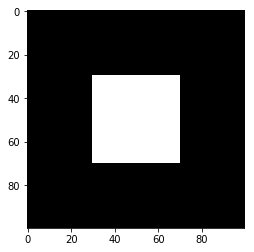

In [13]:
image = np.zeros([100,100])

image[30:70,30:70] = 1

plt.imshow(image)

In [14]:
ski_image = image

for i in range(100):
    ski_image = skimean(ski_image,my_kernal)
    image = mean_filter(image)

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,1,'My Filter')

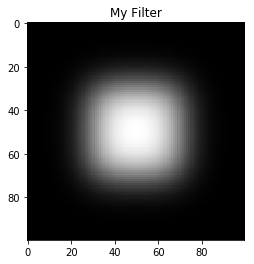

In [17]:
plt.imshow(image)
plt.title("My Filter")

Text(0.5,1,'Skimage Implementation')

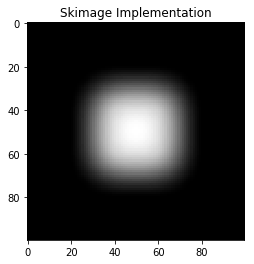

In [18]:
plt.imshow(ski_image)
plt.title("Skimage Implementation")